In [86]:
# Getting rotation matrix
import numpy as np
import functools


def rotate_z_to_vector(b: np.array):
    if np.linalg.norm(b) == 0:
        return np.eye(3)
    if np.linalg.norm(b) != 1:
        raise ValueError("b must be a unit vector")
    # Sourced from https://en.wikipedia.org/wiki/Rodrigues%27_rotation_formula#Matrix_notation
    # b must be unit vector
    # a is the z unit vector
    a = [0, 0, 1]
    v = np.cross(a, b)
    s = np.linalg.norm(v)
    c = np.dot(a, b)
    # The skew-symmetric cross product matrix of v
    vx = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]]) * -1
    # Rotation matrix as per Rodregues formula
    R = np.eye(3) + vx + np.dot(vx, vx) * ((1 - c) / (s**2))
    return R


@functools.lru_cache
def get_unoriented_cylinder(r, h, a=0, noCirPoints=200, nv=200):
    """
    Returns the parameterization of a cylinder given the radius (r), height (h), and origin (a)
    """
    theta = np.linspace(0, 2 * np.pi, noCirPoints)
    v = np.linspace(a, a + h, nv)
    theta, v = np.meshgrid(theta, v)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = v
    return x, y, z

In [4]:
# getting points on the curved surface of the cylinder
def get_cylinder(r, h, a=0, noCirPoints=200, nv=200):
    """
    Returns the parameterization of a cylinder given the radius (r), height (h), and origin (a)
    """
    theta = np.linspace(0, 2 * np.pi, noCirPoints)
    v = np.linspace(a, a + h, nv)
    theta, v = np.meshgrid(theta, v)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    z = v
    #     rotation_matrix = np.array([[cos(a), -sin(a)], [sin(a), cos(a)]])
    # x   , y = zip(*[(x,y) @ rotation_matrix for x,y in zip(x,y)])

    return x, y, z

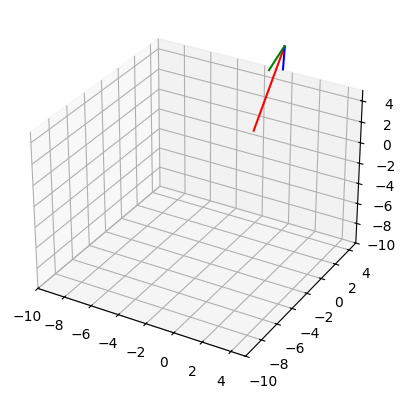

In [5]:
# Graph vector with quiver
import numpy as np
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection="3d")
V = np.array([[1, 1], [-2, 2], [4, -7]])
origin = np.array([[0, 0, 0], [0, 0, 0]])  # origin point

x, y, z = np.meshgrid(
    np.arange(-10, 10, 1), np.arange(-10, 10, 1), np.arange(-10, 10, 1)
)
ax.set_xlim([-10, 5])
ax.set_ylim([-10, 5])
ax.set_zlim([-10, 5])

ax.quiver(1, -2, 4, 1, 2, 7, color=["r", "b", "g"])

plt.show()

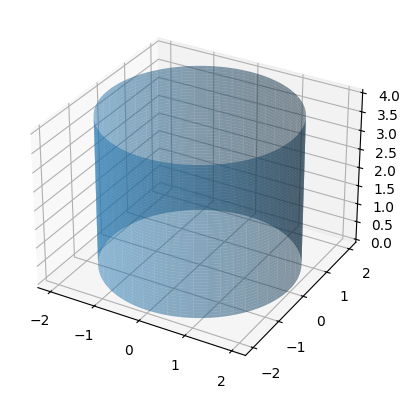

In [6]:
# Draw Cylinder aligned with z axis
import matplotlib.pyplot as plt

from math import sin, cos, pi


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

Xc, Yc, Zc = get_cylinder(2, 4)
# end_cap = [Xc[0], Yc[0], Zc[0]]

ax.plot_surface(Xc, Yc, Zc, alpha=0.5)
plt.show()

In [ ]:
# plot points on a Plane


# yp = np.linspace(-10,10,200)
# xp = np.linspace(-10,10,200)

# xx, yy = np.meshgrid(xp, yp)
xx, yy = np.meshgrid(range(-4, 3), range(-4, 3))
zz = np.zeros(xx.shape)
print(xx.shape)

# ax.plot_surface(xx, yy, zz, alpha=0.75)

/tmp/ipykernel_3390/64178724.py:33: UserWarning: The following kwargs were not used by contour: 'labels'
  plt.contourf(x, y, z, zdir='x', offset=zmin, colors = 'C0', labels = 'YZ')


['ArtistList', 'M', '_3d_extend_contour', '_AxesBase__clear', '_PROPERTIES_EXCLUDED_FROM_SET', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_contourf_set', '_add_text', '_adjustable', '_agg_filter', '_alias_map', '_alpha', '_anchor', '_animated', '_aspect', '_auto_scale_contourf', '_autotitlepos', '_axes', '_axes_locator', '_axis3don', '_axis_map', '_axis_names', '_axisbelow', '_box_aspect', '_button_press', '_button_release', '_calc_coord', '_calc_view_axes', '_callbacks', '_check_no_units', '_children', '_clipon', '_clippath', '_cm_set', '_colorbars', '_convert_dx', '_current_image', '_different_canvas', '_dist', '_draw_grid', '_equal_aspect_axis_indices

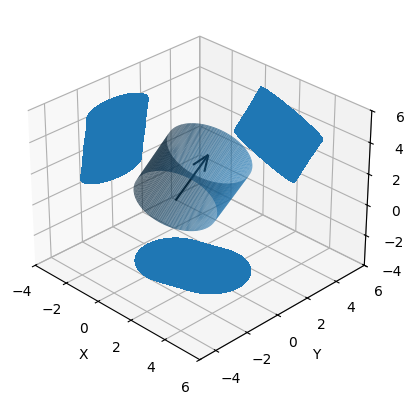

In [144]:
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d

v = np.array([3, 1, 7])
vu = v / np.linalg.norm(v)

Xc, Yc, Zc = get_cylinder(2, 4)

R = rotate_z_to_vector(vu)
t = np.transpose(np.array([Xc, Yc, Zc]))
x, y, z = np.transpose(t @ R, (2, 0, 1))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
zmin = -4

ax.plot_surface(x, y, z, alpha=0.7)


ax.quiver(0, 0, 0, 1.5, 0.5, 3.5, color="black")

# ax.contourf(x, y, z, zdir='z', offset=-1, cmap='Greys', alpha = .5) #'coolwarm')
ax.contourf(x, y, z, zdir="z", offset=zmin, colors="C0")

# Drawing a circle to fill in gap left by contourf
# represents the end cap of the cylinder
p = Circle((0.5, 0.15), 1.77)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=zmin, zdir="z")  # , color = 'Grey')


plt.contourf(x, y, z, zdir="x", offset=zmin, colors="C0", labels="YZ")
# yz_contour.collections[0].set_label('YZ')
ax.contourf(x, y, z, zdir="y", offset=6, colors="C0")


ax.view_init(elev=30, azim=-45, roll=0)
ax.set(xlim=(-4, 6), ylim=(-5, 6), zlim=(zmin, 6), xlabel="X", ylabel="Y", zlabel="Z")

print(dir(ax))
plt.savefig("3d_cyl_projections.svg")
plt.show()

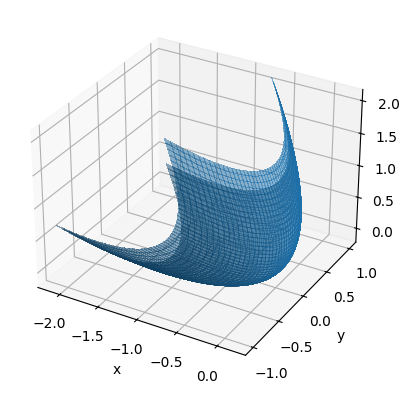

AxisError: axis 3 is out of bounds for array of dimension 3

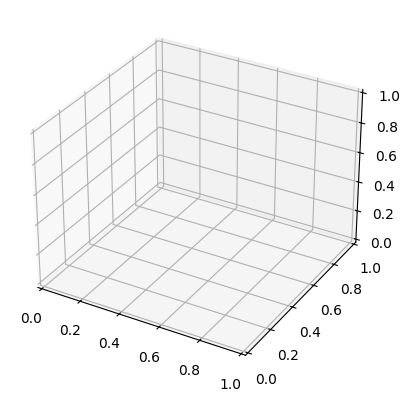

In [54]:
import numpy as np
from matplotlib import pyplot as plt
from math import sin, cos, pi

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# creating grid
y = np.linspace(-1, 1, 200)
x = np.linspace(-1, 1, 200)
x, y = np.meshgrid(x, y)
# set z values
z = x**2 + y**2
# rotate the samples by pi / 4 radians around y
a = pi / 4
t = np.transpose(np.array([x, y, z]), (1, 2, 0))
m = np.array([[cos(a), 0, sin(a)], [0, 1, 0], [-sin(a), 0, cos(a)]])
x, y, z = np.transpose(t @ m, (2, 0, 1))
# label axes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
# plot figure
ax.plot_surface(x, y, z, linewidth=0, antialiased=False, shade=True, alpha=0.5)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# creating grid
y = np.linspace(-1, 1, 200)
x = np.linspace(-1, 1, 200)
x, y = np.meshgrid(x, y)
# set z values
z = x**2 + y**2
# rotate the samples by pi / 4 radians around y
a = pi / 4
t = np.transpose(np.array([x, y, z]), (1, 2, 0))
m = np.array([[cos(a), 0, sin(a)], [0, 1, 0], [-sin(a), 0, cos(a)]])
x, y, z = np.transpose(t @ m, (2, 0, 1))
# label axes
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
# plot figure
ax.plot_surface(x, y, z, linewidth=0, antialiased=False, shade=True, alpha=0.5)
plt.show()

print(x.shape)
print(y.shape)
print(z.shape)
print(Xc.shape)
print(Yc.shape)
print(Zc.shape)


print(t.shape)
print(m.shape)

print(x)
print(Xc)